In [377]:
#This project has been written in c++. 
#Jupyter notebook is used to plot the results. 
#The code is available at https://github.com/joansanchez/STN

In [378]:
import networkx as nx
import matplotlib.pyplot as plt
#import numpy as np
%matplotlib inline

In [379]:
g = nx.Graph()

In [380]:
#The first thing we do is to load the nodes of the graph.
filepath = 'NodeCoordinates.txt'  
with open(filepath) as fp:
    line = fp.readline()
    pos = {}
    node_list = []
    while line:
        new_line = line.strip().split(" ")
        node_list.append(new_line[0])
        pos[new_line[0]] = (int(new_line[1]), int(new_line[2]))
        line = fp.readline()

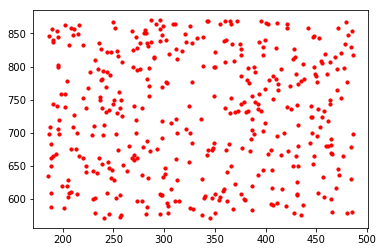

In [381]:
#And we draw the graph with which we are going to work.
nx.draw_networkx_nodes(g,pos,node_size=10,nodelist=node_list, with_labels=False)


In [382]:
#We apply k-means algorithm to see the final communities of the graph (implementation of the k-means algorithm in c++)
filepath = 'NodeColors.txt'  
with open(filepath) as fp:
    line = fp.readline()
    color_map = []
    while line:
        new_line = line.strip().split(" ")
        color_map.append(new_line[1])
        line = fp.readline()

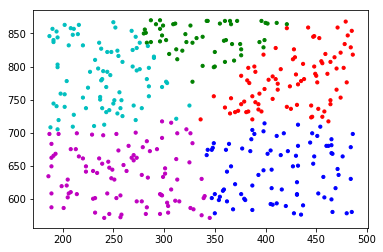

In [383]:
#And we color the nodes according to the community to which they belong
nx.draw_networkx_nodes(g,pos, node_color = color_map, node_size=10,nodelist=node_list, with_labels=False)

In [384]:
#Now we draw the validator nodes in gold.
filepath = 'NodeCenters.txt'  
with open(filepath) as fp:
    line = fp.readline()
    while line:
        new_line = line.strip().split(" ")
        tmpString = new_line[0]
        if (tmpString[0] == 'i'):
            node_list.append(new_line[0])
            pos[new_line[0]] = (int(new_line[1]), int(new_line[2]))
            color_map.append('gold')
        line = fp.readline()


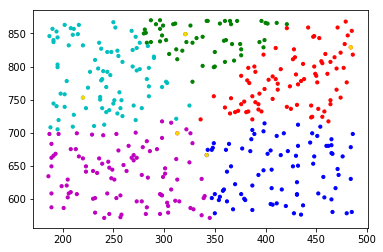

In [385]:
nx.draw_networkx(g,pos, node_color = color_map, node_size=10,nodelist=node_list, with_labels=False)


In [386]:
#We now compare the position and distance between the nodes with more adjacencies within a 
#community (fuchsia) and those that the validator gives us (gold)
filepath = 'NodeCentersByAdjacncy.txt'  
with open(filepath) as fp:
    line = fp.readline()
    while line:
        new_line = line.strip().split(" ")
        tmpString = new_line[0]
        if (tmpString[0] == 'i') or (tmpString[0] == 'a'):
            node_list.append(new_line[0])
            pos[new_line[0]] = (int(new_line[1]), int(new_line[2]))
            if tmpString[0] == 'i':
                color_map.append('gold')
            elif tmpString[0] == 'a':
                color_map.append('fuchsia')
                g.add_edge('infl'+tmpString[4], tmpString)
        else:
            print (line)
        line = fp.readline()

Distance between node with more adjacencies and validator node in community b: 166.868

Distance between node with more adjacencies and validator node in community c: 39.6232

Distance between node with more adjacencies and validator node in community g: 23.0868

Distance between node with more adjacencies and validator node in community m: 123.939

Distance between node with more adjacencies and validator node in community r: 109.859



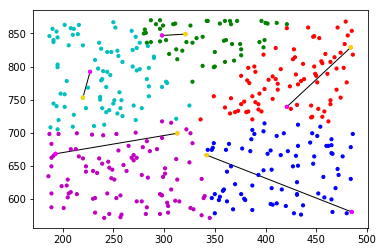

In [387]:
#Above, the distances between the node with more adjacencies and the validator nodes
#Below, the representation of the communities
nx.draw_networkx(g,pos, node_color = color_map, node_size=10,nodelist=node_list, with_labels=False)

In [388]:
#We now compare the position and distance between the nodes with more pageRank within a 
#community (black) whith the nodes with more adyacencies (fuchsia) and those that the validator gives us (gold)
filepath = 'NodeCentersByPageRank.txt'  
with open(filepath) as fp:
    line = fp.readline()
    while line:
        new_line = line.strip().split(" ")
        tmpString = new_line[0]
        if (tmpString[0] == 'r'):
            node_list.append(new_line[0])
            pos[new_line[0]] = (int(new_line[1]), int(new_line[2]))
            color_map.append('black')
            g.add_edge('infl'+tmpString[4], tmpString)
        elif (tmpString[0] != 'i'):
            print (line)
        line = fp.readline()

Distance between node with more pageRank and validator node in community b: 166.868

Distance between node with more pageRank and validator node in community c: 39.6232

Distance between node with more pageRank and validator node in community g: 23.0868

Distance between node with more pageRank and validator node in community m: 123.939

Distance between node with more pageRank and validator node in community r: 40.3113



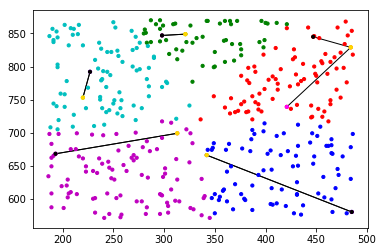

In [389]:
#Above, the distances between the node with more PageRank and the validator nodes
#Below, the representation of the communities
nx.draw_networkx(g,pos, node_color = color_map, node_size=10,nodelist=node_list, with_labels=False)

In [390]:
#As a curiosity, we can also load all the edges
filepath = 'AdjacencyMatrix.txt'  
with open(filepath) as fp:  
    line = fp.readline()
    while line:
        new_line = line.strip().split("\t")
        if len(new_line)>1:
            adjacency = new_line[1].strip().split(" ")
            i = 0
            while i < len(adjacency):
                g.add_edge(new_line[0], adjacency[i])
                i +=1
        line = fp.readline()

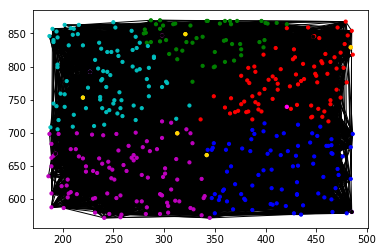

In [391]:
#As the graph is highly connected, we won't be able to appreciate clearly the edges.
nx.draw_networkx(g,pos,node_size=10,nodelist=node_list,node_color=color_map, with_labels=False)

In [392]:
g.number_of_nodes()

415

In [393]:
g.number_of_edges()

9778